In [1]:
!pip install processmcrat

In [3]:
%matplotlib notebook
import processmcrat as pm
import astropy.units as unit
from astropy import constants as const
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mcrat_sim=pm.McratSimLoad("/Users/josearita-escalante/Documents/GRB-NASA/MCRaT-gits/Hydro-Sim/PLUTO/mcrat/science/1/") 
mcrat_sim.load_frame(250, read_stokes=False)
observation=pm.MockObservation(1, 30, 1e14, 5, mcratsimload_obj=mcrat_sim)

In [5]:
lis=observation.detected_photons.detection_time
lis.sort()
print(min(lis),",",max(lis))

6.1479683207103335 , 122.11911220872571


In [16]:
spectrum_dict=observation.spectrum(5, 125)
observation.set_spectral_fit_parameters()
lightcurve_dict=observation.lightcurve(time_start=5, time_end=125, dt=0.2)

<IPython.core.display.Javascript object>


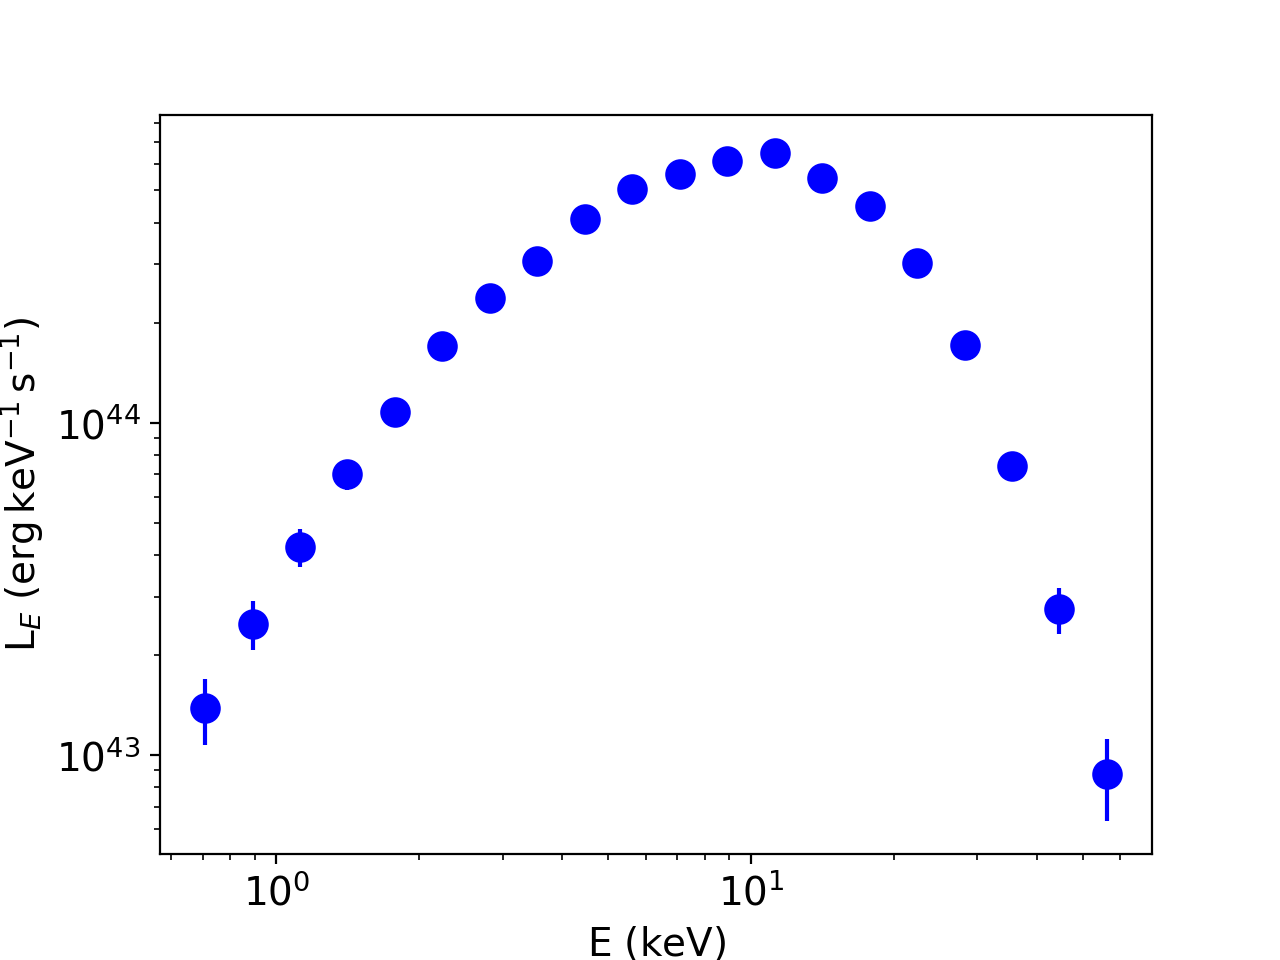

In [17]:
#plot the MCRaT spectrum
f, ax=pm.plot_spectrum(spectrum_dict)

<ipython-input-11-5ad0fa2341b5>:28: RuntimeWarning: overflow encountered in exp
  model=(energies**3/(const.h.cgs.value*const.c.cgs.value)**2)/(np.exp(energies/(const.k_B.cgs.value*temp))-1)


<IPython.core.display.Javascript object>


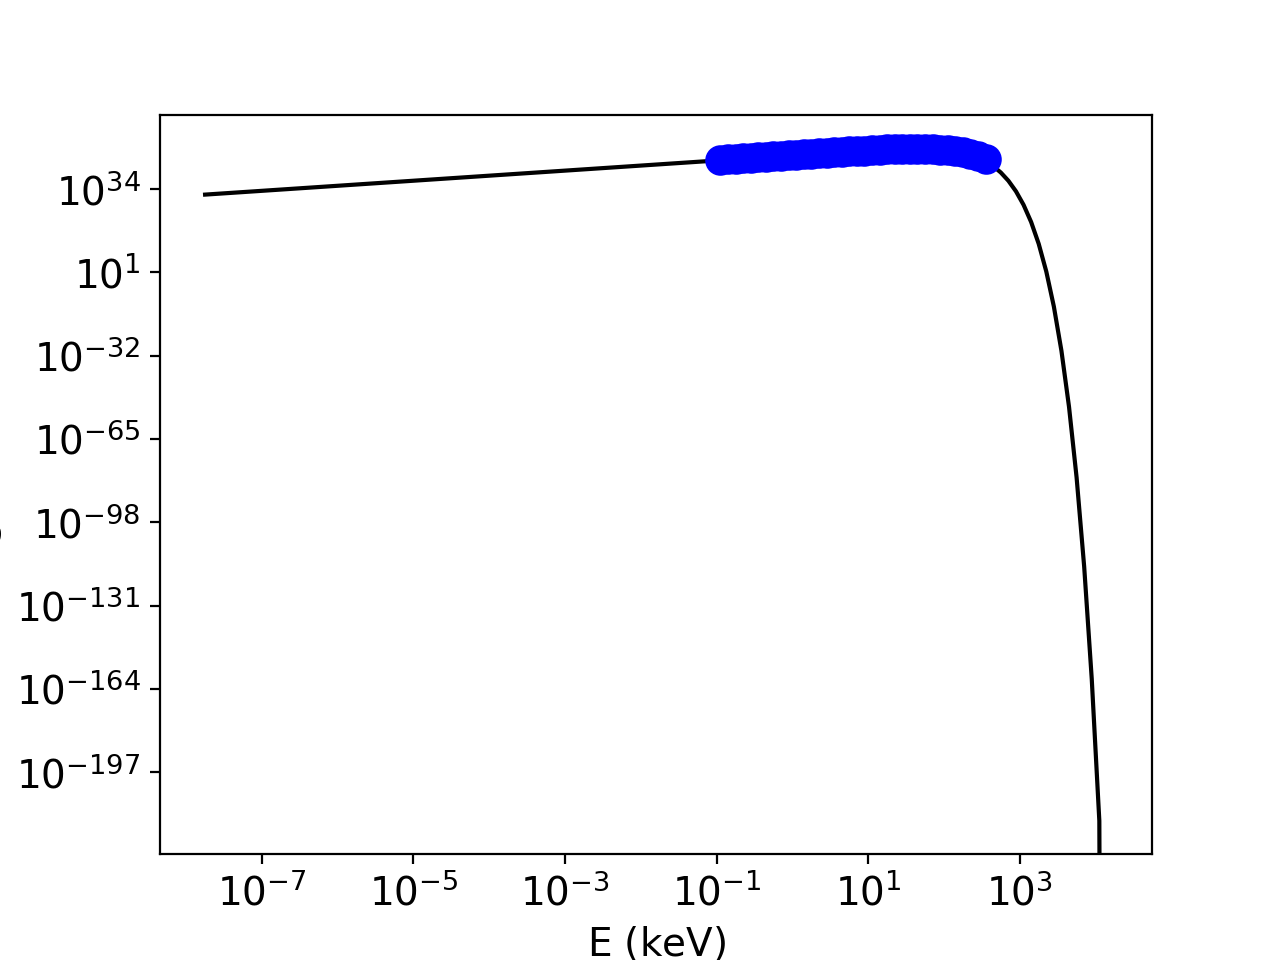

In [11]:
def blackbody_function(energies, temp, normalization, energy_unit=unit.keV):
	"""
	:param energies:
	:param temp:
	:param normalization:
	:param energy_unit:
	:return:
	"""

	energies=energies*energy_unit.to(unit.erg)
	try:
		energies=energies.value
	except AttributeError:
		energies = energies

	try:
		temp=temp.value
	except AttributeError:
		temp = temp
  
	try:
		normalization=normalization.value
	except AttributeError:
		normalization = normalization


	model =np.empty(energies.size)
	model=(energies**3/(const.h.cgs.value*const.c.cgs.value)**2)/(np.exp(energies/(const.k_B.cgs.value*temp))-1)
	energies = energies * unit.erg.to(energy_unit)
	model=model/np.trapz(model,x=energies)*normalization

	return model

data=blackbody_function(spectrum_dict['energy_bin_center'], 1.3e9, np.trapz(spectrum_dict['spectrum'], x=spectrum_dict['energy_bin_center']))

factor_x=(spectrum_dict['energy_bin_center'][data.argmax()]/spectrum_dict['energy_bin_center'][spectrum_dict['spectrum'].argmax()])**-1

f, ax=pm.plot_spectrum(spectrum_dict)
ax.plot(spectrum_dict['energy_bin_center']*factor_x, data*spectrum_dict['spectrum'].max()/data.max(), 'k-')

<IPython.core.display.Javascript object>


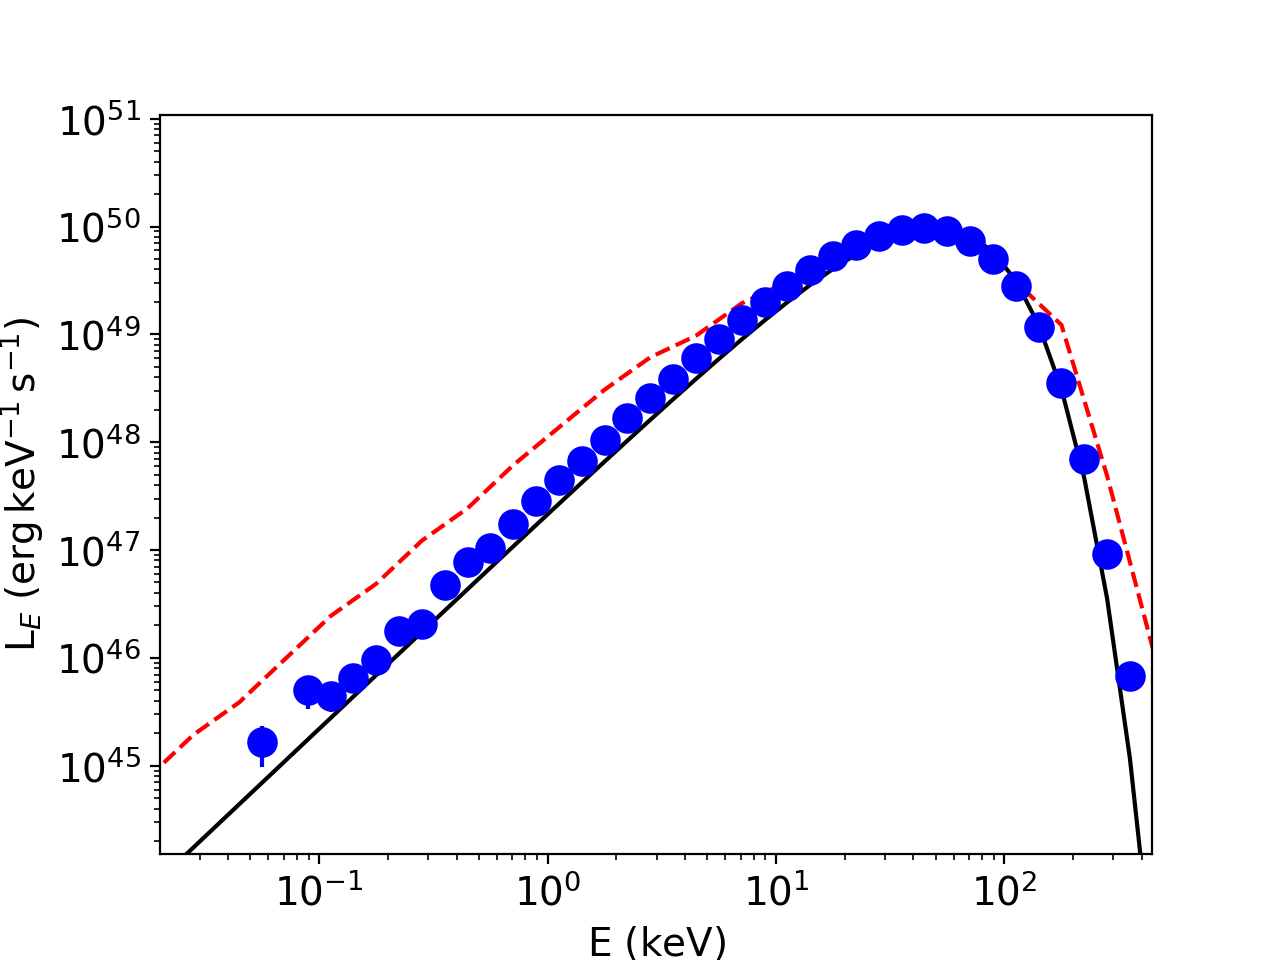

In [12]:
def goodman_function(energy_maximum, spectrum_maximum):
	"""
	Function that returns Goodman's scalable spherical explosion spectra to compare against a spectra acquired by a
	spherical explosion run in MCRAT. To compare this to simulation data, the simulation spectrum needs to be in units
	of erg/s/energy_unit.
	:param energy_maximum:
	:param spectrum_maximum:
	:return:
	"""

	goodman_energy=10**np.array([-3,-2.8,-2.6,-2.4,-2.2,-2,-1.8,-1.6,-1.4,-1.2,-1,-.8,-.6,-.4,-.2,0,.2,.4,.6,.8,1.,1.2,1.4])
	goodman_spectrum=10**np.array([-5.2,-4.8,-4.5,-4.1,-3.7,-3.4,-3,-2.7,-2.3,-1.95,-1.6,-1.3,-1.1,-0.8,-0.6,-0.4,-0.2,-0.1,-0.2,-0.6,-1,-2.4,-4])

	y_shift=spectrum_maximum/goodman_spectrum.max()
	x_shift=energy_maximum/goodman_energy[goodman_spectrum.argmax()]

	goodman_spectrum_shift=goodman_spectrum*y_shift
	goodman_energy_shift=goodman_energy*x_shift

	return goodman_energy_shift, goodman_spectrum_shift

goodman=goodman_function(spectrum_dict['energy_bin_center'][spectrum_dict['spectrum'].argmax()], spectrum_dict['spectrum'].max())
f, ax=pm.plot_spectrum(spectrum_dict, photon_num_min=1)
ax.plot(spectrum_dict['energy_bin_center']*factor_x, data*spectrum_dict['spectrum'].max()/data.max(), 'k-')
ax.plot(goodman[0], goodman[1], 'r--')

In [15]:
a=observation.detected_photons.scatterings
a.sort()
a

array([ 964.,  966., 1025., ..., 3726., 3733., 3743.])